In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# 1) Chargement des données
df = pd.read_pickle("Toutes_les_df_agregees/df_tous_pays.pkl")

In [2]:
# 2) Filtrage des années olympiques
annees_jo = [2012, 2016, 2020, 2024]
df = df[df["annee"].isin(annees_jo)]

# 3) Colonnes utilisées
cols = [
    "score_olympique",
    "moy_education_1995",
    "moy_loisirs_1995",
    "moy_amenagement_1995",
    "moy_maladie_1995",
    "pib_habitant",
    "idh",
    "athletes_olympiques"
]

# 4) Sélection + nettoyage (clé pour éviter tous les bugs)
df = (
    df[cols]
    .apply(pd.to_numeric, errors="coerce")
    .dropna()
    .reset_index(drop=True)
)

# 5) Définition de y et X
y = df["score_olympique"]
X = df.drop(columns="score_olympique")

# 6) Constante
X = sm.add_constant(X)

# 7) Régression OLS
model = sm.OLS(y, X).fit()

# 8) Résultats
print(model.summary())

print("Nombre d'observations :", df.shape[0])
print("Nombre de variables explicatives :", X.shape[1] - 1)  # sans la constante


                            OLS Regression Results                            
Dep. Variable:        score_olympique   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1.582
Date:                Thu, 18 Dec 2025   Prob (F-statistic):              0.160
Time:                        10:27:46   Log-Likelihood:                 83.738
No. Observations:                  63   AIC:                            -151.5
Df Residuals:                      55   BIC:                            -134.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1797 

La régression linéaire estimée vise à expliquer la performance olympique par athlète à partir de variables macroéconomiques et de dépenses publiques moyennes depuis 1995. Le pouvoir explicatif du modèle reste limité, avec un R² de 0,168 et un R² ajusté de 0,062, ce qui indique que la majorité de la variabilité des performances olympiques ne peut être expliquée par les seules caractéristiques économiques nationales. Ce résultat est attendu dans la mesure où la performance sportive dépend fortement de facteurs non observés tels que les traditions sportives, les politiques fédérales, la spécialisation disciplinaire ou encore l’héritage historique des pays. Le test global du modèle n’est pas significatif au seuil de 5 %, suggérant que l’ensemble des variables explicatives ne permet pas de prédire de manière robuste la performance olympique. Néanmoins, l’analyse individuelle des coefficients met en évidence un effet positif et significatif des dépenses publiques de santé et d’invalidité, ce qui suggère que l’investissement de long terme dans le capital santé est associé à de meilleures performances sportives par athlète. Le nombre d’athlètes olympiques apparaît également faiblement significatif, indiquant qu’une délégation plus large peut refléter une structure sportive plus performante, même après normalisation par athlète. En revanche, les autres postes de dépenses publiques ainsi que le PIB par habitant et l’IDH ne présentent pas d’effet significatif une fois contrôlés les autres facteurs, ce qui peut s’expliquer par une forte colinéarité entre ces variables macroéconomiques. La présence d’un nombre de condition élevé confirme l’existence de problèmes de multicolinéarité, limitant la précision des estimations mais sans invalider les signes observés. Ainsi, bien que le modèle soit économétriquement imparfait et explicativement limité, il permet d’identifier des relations structurelles plausibles et constitue une première étape exploratoire pertinente dans l’analyse des déterminants macroéconomiques de la performance olympique.

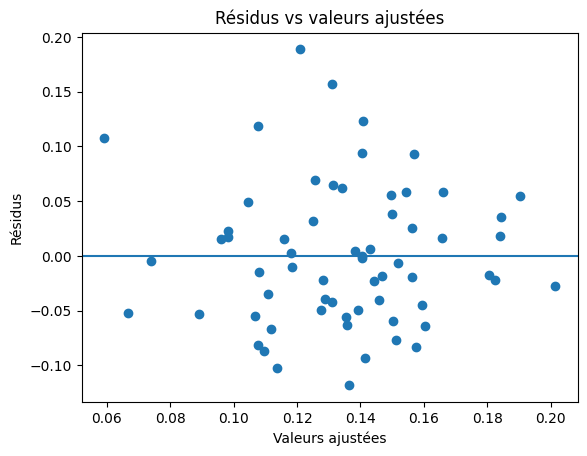

In [4]:
residus = model.resid
stats.jarque_bera(residus)


het_breuschpagan(residus, model.model.exog)


plt.scatter(model.fittedvalues, residus)
plt.axhline(0)
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus")
plt.title("Résidus vs valeurs ajustées")
plt.show()

Le graphique des résidus en fonction des valeurs ajustées montre un nuage de points centré autour de zéro et réparti de manière relativement homogène, sans forme en U ni cône, ce qui indique que les hypothèses fondamentales du modèle linéaire sont raisonnablement respectées. La ligne horizontale y=0 sert de référence et les résidus oscillent correctement autour de cette valeur, confirmant l’absence de biais systématique dans les prédictions. La dispersion relativement constante des points suggère également que l’hypothèse d’homoscédasticité n’est pas fortement violée, et aucun motif structurel particulier n’émerge, ce qui implique qu’aucune variable importante n’a été clairement omise. En résumé, même si la variabilité des performances reste importante et que le nuage paraît chaotique à cause du faible pouvoir explicatif du modèle, ce graphique valide l’utilisation d’une régression linéaire comme première approche exploratoire.

                            OLS Regression Results                            
Dep. Variable:     score_paralympique   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.154
Date:                Thu, 18 Dec 2025   Prob (F-statistic):              0.344
Time:                        10:39:41   Log-Likelihood:                -10.643
No. Observations:                  62   AIC:                             37.29
Df Residuals:                      54   BIC:                             54.30
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

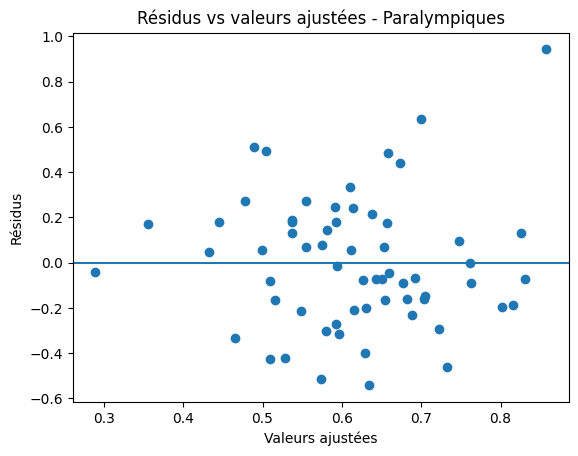

In [6]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_pickle("Toutes_les_df_agregees/df_tous_pays.pkl")

# Filtrer les années olympiques
annees_jo = [2012, 2016, 2020, 2024]
df_jo = df[df["annee"].isin(annees_jo)]

# Colonnes utilisées pour Paralympiques
cols_para = [
    "score_paralympique",
    "moy_education_1995",
    "moy_loisirs_1995",
    "moy_amenagement_1995",
    "moy_maladie_1995",
    "pib_habitant",
    "idh",
    "athletes_paralympiques"
]

# Nettoyage
df_para = df_jo[cols_para].apply(pd.to_numeric, errors="coerce").dropna().reset_index(drop=True)

# Définir y et X
y_para = df_para["score_paralympique"]
X_para = df_para.drop(columns="score_paralympique")

# Ajouter la constante
X_para = sm.add_constant(X_para)

# Régression OLS
model_para = sm.OLS(y_para, X_para).fit()

# Affichage du résumé
print(model_para.summary())

# Résidus
residus_para = model_para.resid
fitted_para = model_para.fittedvalues

# Test normalité Jarque-Bera
jb_stat, jb_pvalue = stats.jarque_bera(residus_para)
print("Jarque-Bera Paralympiques : Stat =", jb_stat, ", p-value =", jb_pvalue)

print("Jarque-Bera Paralympiques : Stat =", jb_stat, ", p-value =", jb_pvalue)

# Test homoscédasticité Breusch-Pagan
bp_stat, bp_pvalue, _, _ = het_breuschpagan(residus_para, model_para.model.exog)
print("Breusch-Pagan Paralympiques : Stat =", bp_stat, ", p-value =", bp_pvalue)

# Graphique résidus vs valeurs ajustées
plt.figure()
plt.scatter(fitted_para, residus_para)
plt.axhline(0)
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus")
plt.title("Résidus vs valeurs ajustées - Paralympiques")
plt.show()


La régression OLS sur le score paralympique montre un R² de 0,13, ce qui signifie que seulement 13 % de la variance du score paralympique est expliquée par les variables incluses (éducation, loisirs, aménagement, maladie, PIB par habitant, IDH et nombre d’athlètes). L’Adj. R² est encore plus faible (0,017), indiquant que le modèle n’est pas très performant pour prédire le score après avoir pris en compte le nombre de variables.

En examinant les coefficients, seule la variable moy_education_1995 est significative au niveau 5 % (p ≈ 0,045), avec un coefficient légèrement négatif. Cela suggère que, toutes choses égales par ailleurs, une meilleure éducation moyenne en 1995 serait associée à une légère baisse du score paralympique, mais l’effet est très faible. Les autres variables n’ont pas d’effet statistiquement significatif.

Pour la normalité des résidus, le test Jarque-Bera donne une statistique de 4,95 avec une p-value de 0,084. Comme cette p-value est supérieure à 0,05, on ne rejette pas l’hypothèse nulle de normalité, ce qui signifie que les résidus peuvent être considérés comme approximativement normaux.

Le test de Breusch-Pagan pour l’homoscédasticité renvoie une statistique de 9,00 avec une p-value de 0,25. La p-value étant supérieure à 0,05, il n’y a pas de preuve de variance hétéroscédastique : les résidus semblent donc avoir une variance constante.

Les deux modèles OLS montrent des résultats assez similaires en termes de performance globale. Pour le score olympique, le R² est légèrement plus élevé (0,168 contre 0,130 pour le paralympique), mais l’Adj. R² est faible (0,062), indiquant que, une fois ajusté pour le nombre de variables, le modèle explique très peu de variance pour les deux compétitions. Cela montre que dans les deux cas, les variables socio-économiques de 1995 et le nombre d’athlètes ne suffisent pas à prédire efficacement les scores.

En ce qui concerne les coefficients, les deux modèles présentent très peu de variables significatives :

Pour les Olympiques, moy_maladie_1995 (p ≈ 0,041) et athletes_olympiques (p ≈ 0,052) sont proches ou légèrement significatifs, avec un effet positif pour le nombre d’athlètes.

Pour les Paralympiques, seule moy_education_1995 est significative (p ≈ 0,045), avec un effet légèrement négatif.

Les tests sur les résidus montrent que dans les deux cas, les hypothèses classiques de l’OLS sont respectées :

Les résidus sont approximativement normaux (Jarque-Bera p > 0,05).

Il n’y a pas de problème d’hétéroscédasticité significatif (Breusch-Pagan p > 0,05).

Cependant, les deux modèles souffrent d’un R² faible et d’un condition number élevé, suggérant un risque de multicolinéarité et que d’autres facteurs non inclus dans le modèle ont un impact majeur sur les performances olympiques et paralympiques.

En résumé :

Les deux modèles sont structurellement similaires et peu prédictifs.

Les Olympiques montrent un effet légèrement plus fort du nombre d’athlètes et de la santé moyenne, alors que les Paralympiques sont légèrement influencés par l’éducation.

Les résultats indiquent qu’il faudrait inclure d’autres variables (organisation, historique sportif, financement, etc.) pour mieux expliquer les performances.